#### Full citation

UNDP, Human Development Report (2024) – with minor processing by Our World in Data. “Human Development Index – UNDP” [dataset]. UNDP, Human Development Report, “Human Development Report 2023-2024” [original data].

Source: UNDP, Human Development Report (2024) – with minor processing by Our World In Data

In [1]:
import pandas as pd

# Load the CSV file
csv_file_path = "./human-development-index.csv"
df = pd.read_csv(csv_file_path)

# Group data by year
years = df["Year"].unique()

# Define the output Excel file path
excel_file_path = "./HDI_process.xlsx"

# Create an ExcelWriter object and write different sheets
with pd.ExcelWriter(excel_file_path, engine="openpyxl") as writer:
    for year in sorted(years):
        df_year = df[df["Year"] == year].sort_values(by="Entity")
        df_year.to_excel(writer, sheet_name=str(year), index=False)

print(f"Excel file has been successfully generated: {excel_file_path}")

Excel file has been successfully generated: ./HDI_process.xlsx


In [2]:
import pandas as pd

# Load the processed Excel file
excel_file_path = "./HDI_process.xlsx"

# Read the Excel file
xls = pd.ExcelFile(excel_file_path)

# Select the 2022 data sheet
df_2022 = pd.read_excel(xls, sheet_name="2022")

# Print the first 10 rows of the 2022 data
print("2022 Data (First 10 Rows):")
print(df_2022.head(10))

# Select Switzerland's data and sort by year
df_switzerland = pd.concat(
    [pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names]
)
df_switzerland = df_switzerland[df_switzerland["Entity"] == "Switzerland"].sort_values(
    by="Year"
)

# Print the first 10 rows of Switzerland's sorted data
print("Switzerland Data (Sorted by Year, First 10 Rows):")
print(df_switzerland.head(10))

2022 Data (First 10 Rows):
                Entity Code  Year  Human Development Index
0          Afghanistan  AFG  2022                 0.462000
1               Africa  NaN  2022                 0.556653
2              Albania  ALB  2022                 0.789000
3              Algeria  DZA  2022                 0.745000
4              Andorra  AND  2022                 0.884000
5               Angola  AGO  2022                 0.591000
6  Antigua and Barbuda  ATG  2022                 0.826000
7   Arab States (UNDP)  NaN  2022                 0.704000
8            Argentina  ARG  2022                 0.849000
9              Armenia  ARM  2022                 0.786000
Switzerland Data (Sorted by Year, First 10 Rows):
          Entity Code  Year  Human Development Index
132  Switzerland  CHE  1990                    0.850
132  Switzerland  CHE  1991                    0.852
132  Switzerland  CHE  1992                    0.855
132  Switzerland  CHE  1993                    0.859
132  Swit

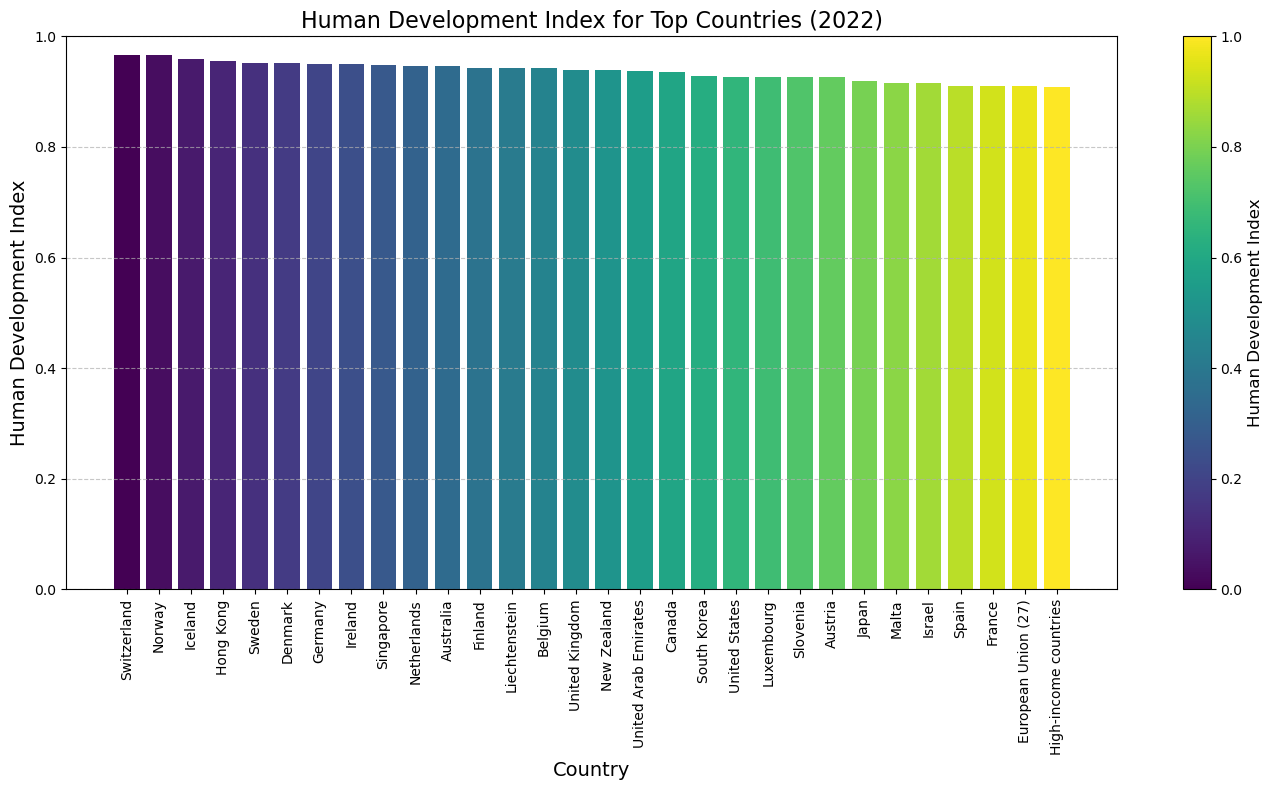

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and create figure with proper axes configuration
fig, ax = plt.subplots(figsize=(14, 8))

# Sort data by HDI value for better visualization
sorted_data = df_2022.sort_values("Human Development Index", ascending=False)

# Select top countries for better readability
top_countries = sorted_data.head(30)  # Showing top 30 countries

# Create a colormap based on HDI values
colors = plt.cm.viridis(np.linspace(0, 1, len(top_countries)))

# Create the bar plot with explicit ax parameter
bars = ax.bar(
    top_countries["Entity"], top_countries["Human Development Index"], color=colors
)

# Customize the plot
ax.set_title("Human Development Index for Top Countries (2022)", fontsize=16)
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Human Development Index", fontsize=14)
ax.set_ylim(0, 1.0)  # HDI ranges from 0 to 1
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90, fontsize=10)

# Add a colorbar legend - FIXED APPROACH
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # Note the fig.colorbar and passing ax parameter
cbar.set_label("Human Development Index", fontsize=12)

# Tight layout to make sure everything fits
plt.tight_layout()

# # Save the figure as a static image
# plt.savefig('hdi_top_countries_2022.png', dpi=300, bbox_inches='tight')

# Display the figure in the notebook
plt.show()

Four countries' data:
Entity  Year  China  Egypt  Switzerland  United States
0       1990  0.482  0.567        0.850          0.875
1       1991  0.489  0.574        0.852          0.875
2       1992  0.501  0.580        0.855          0.880
3       1993  0.512  0.587        0.859          0.882
4       1994  0.522  0.594        0.861          0.885
5       1995  0.532  0.601        0.863          0.886
6       1996  0.543  0.610        0.867          0.887
7       1997  0.554  0.615        0.872          0.889
8       1998  0.565  0.620        0.878          0.891
9       1999  0.575  0.625        0.881          0.891


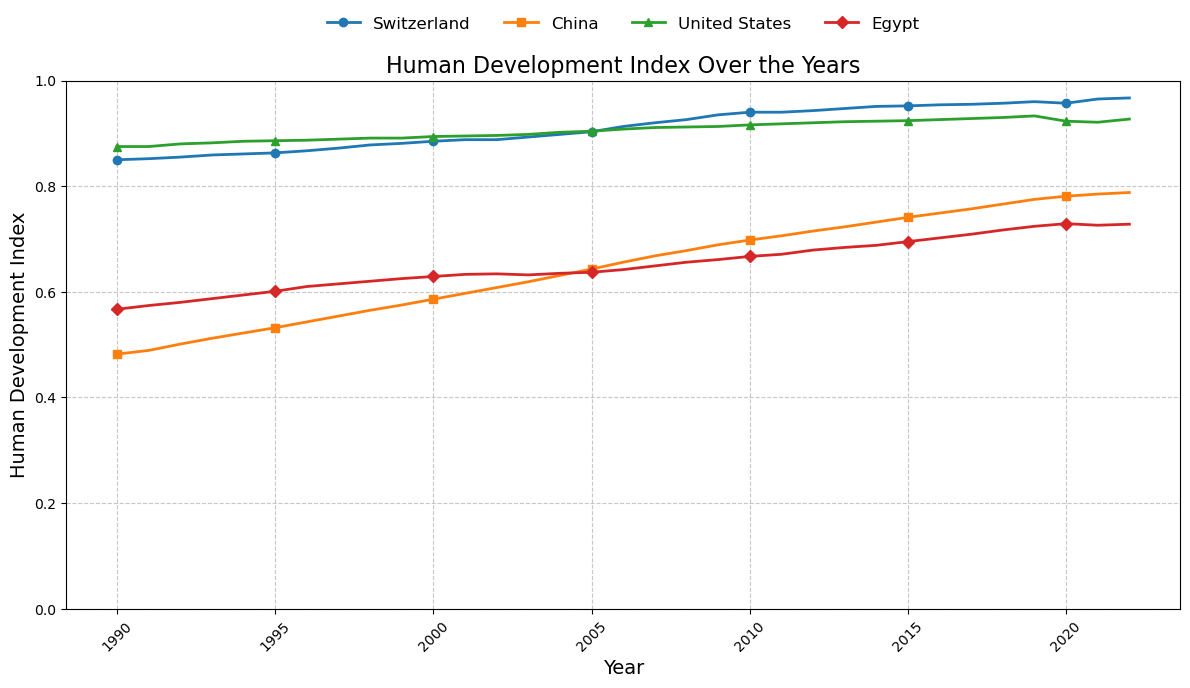

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data is already loaded and processed
# Select four countries' data and sort by year
selected_countries = ["Switzerland", "China", "United States", "Egypt"]
df_selected = pd.concat(
    [pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names]
)
df_selected = df_selected[df_selected["Entity"].isin(selected_countries)].sort_values(
    by=["Year", "Entity"]
)

# Pivot the dataframe to get 'Year' as index and selected countries as columns
df_pivot = df_selected.pivot(
    index="Year", columns="Entity", values="Human Development Index"
)
df_pivot.reset_index(inplace=True)

# Print the first 10 rows of the pivoted dataframe
print("Four countries' data:")
print(df_pivot.head(10))

# Create a static line plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each country with different colors and line styles
countries = ["Switzerland", "China", "United States", "Egypt"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red
markers = ["o", "s", "^", "D"]  # Circle, Square, Triangle, Diamond

for i, country in enumerate(countries):
    if country in df_pivot.columns:
        ax.plot(
            df_pivot["Year"],
            df_pivot[country],
            label=country,
            color=colors[i],
            marker=markers[i],
            markersize=6,
            linewidth=2,
            markevery=5,
        )  # Add markers every 5 points to avoid overcrowding

# Customize the plot
ax.set_title("Human Development Index Over the Years", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Human Development Index", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_ylim(0, 1.0)  # HDI ranges from 0 to 1

# Add legend at the top
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=len(countries),
    frameon=False,
    fontsize=12,
)

# Add grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

# Format x-axis to show years with appropriate intervals
plt.xticks(rotation=45)

# Improve the appearance
fig.tight_layout()

# # Save the figure as a static image
# plt.savefig('hdi_countries_comparison.png', dpi=300, bbox_inches='tight')

# Display the figure in the notebook
plt.show()

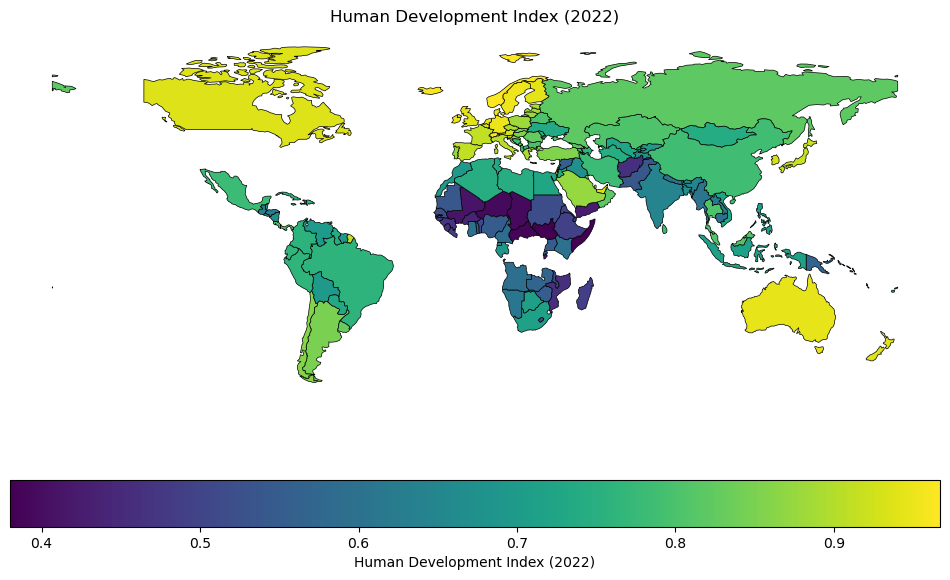

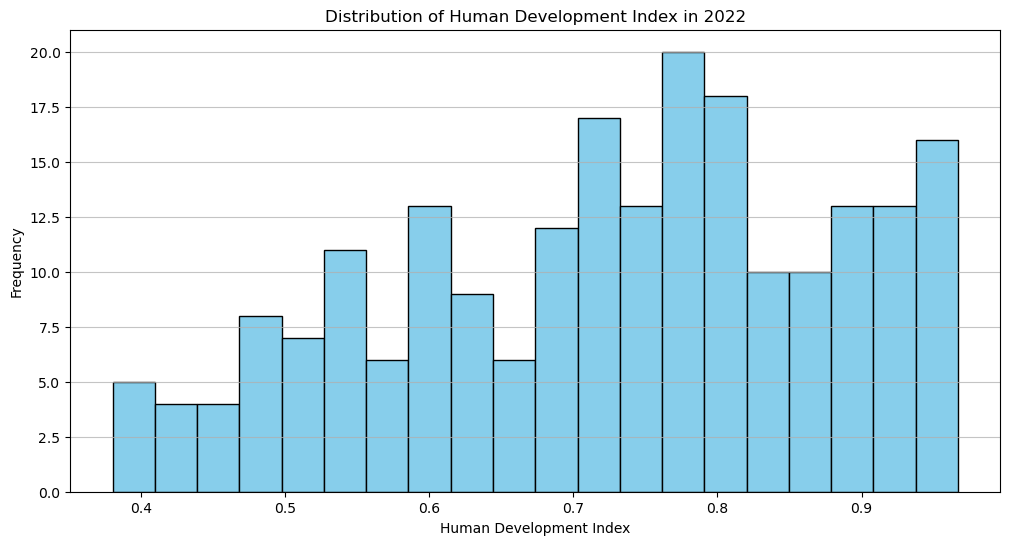

In [5]:
import geoviews as gv
import geopandas as gpd
from holoviews import opts
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

# Set matplotlib to display inline in the notebook
%matplotlib inline

# Assuming df_2022 is already defined
df_2022["Human Development Index"] = pd.to_numeric(
    df_2022["Human Development Index"], errors="coerce"
)

# Load world map data from Natural Earth alternative source
world = gpd.read_file(
    "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
)

# Merge the 2022 HDI data with world map data
df_merged = world.merge(df_2022, left_on="ADMIN", right_on="Entity", how="left")

# Drop rows with missing HDI values
df_merged = df_merged.dropna(subset=["Human Development Index"])

# Create a figure for the world map
fig, ax = plt.subplots(figsize=(12, 7))

# Plot using geopandas directly with matplotlib
df_merged.plot(
    column="Human Development Index",
    cmap="viridis",
    linewidth=0.5,
    edgecolor="black",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Human Development Index (2022)",
        "orientation": "horizontal",
    },
)

plt.title("Human Development Index (2022)")
plt.axis("off")  # Turn off axis

# # Save the figure first
# fig.savefig('hdi_world_map_2022.png', dpi=300, bbox_inches='tight')

# Then display it in the notebook
plt.show()

# Create a new figure for the histogram
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(
    df_2022["Human Development Index"].dropna(),
    bins=20,
    color="skyblue",
    edgecolor="black",
)
ax2.set_title("Distribution of Human Development Index in 2022")
ax2.set_xlabel("Human Development Index")
ax2.set_ylabel("Frequency")
ax2.grid(axis="y", alpha=0.75)

# # Save histogram
# fig2.savefig('hdi_histogram_2022.png', dpi=300, bbox_inches='tight')

# Display histogram in notebook
plt.show()